### Import the necessary libraries if you are starting a new notebook.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [5]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [6]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### What should we do with the customer_id column?

In [7]:
customer_df = customer_df.drop('Customer', axis=1)

We have dropped the 'Customer' column, as it has a different value per row. 

### Load the continuous and discrete variables into numericals_df and categorical_df variables

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [15]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [16]:
numerical_df = customer_df.select_dtypes(include=['int', 'float'])

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [17]:
categorical_df = customer_df.select_dtypes(include=['object'])

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             9134 non-null   object
 1   Response          9134 non-null   object
 2   Coverage          9134 non-null   object
 3   Education         9134 non-null   object
 4   EmploymentStatus  9134 non-null   object
 5   Gender            9134 non-null   object
 6   Location Code     9134 non-null   object
 7   Marital Status    9134 non-null   object
 8   Policy Type       9134 non-null   object
 9   Policy            9134 non-null   object
 10  Renew Offer Type  9134 non-null   object
 11  Sales Channel     9134 non-null   object
 12  Vehicle Class     9134 non-null   object
 13  Vehicle Size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


### Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

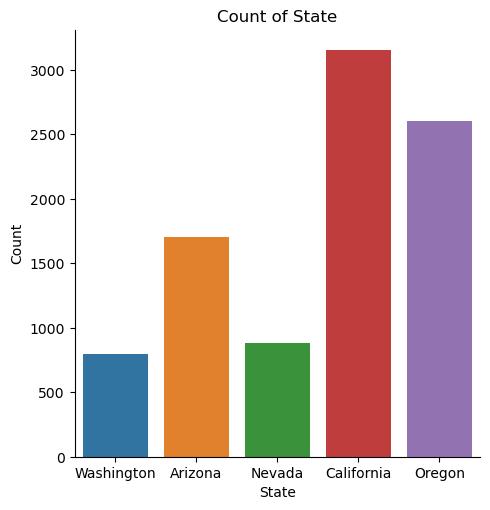

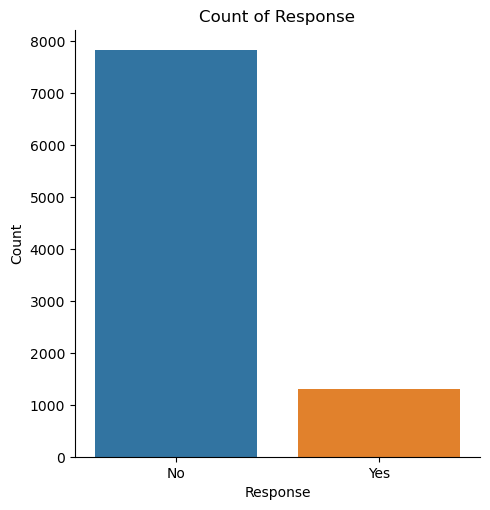

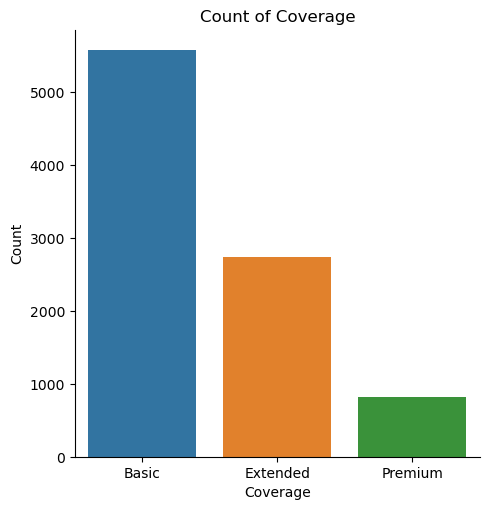

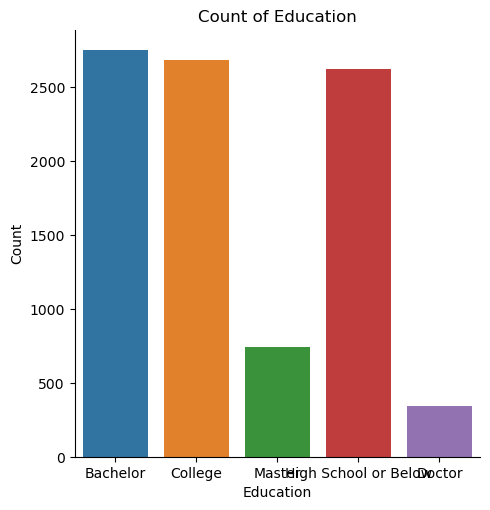

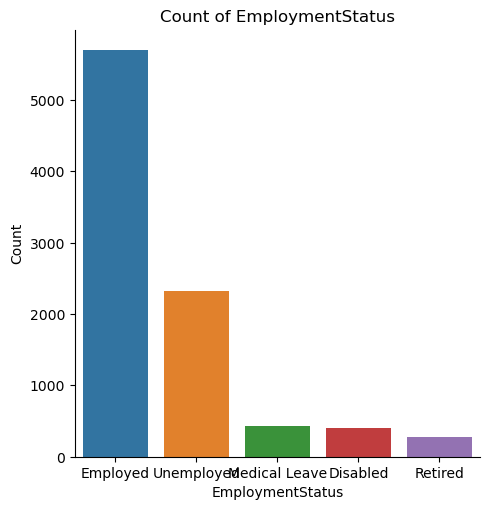

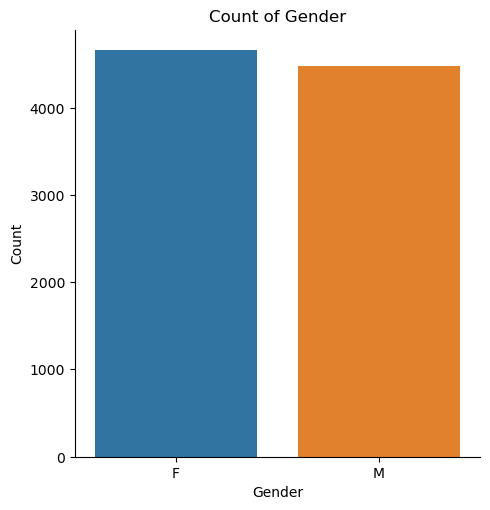

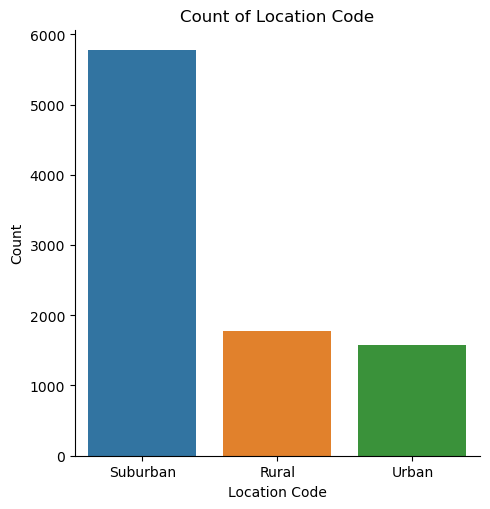

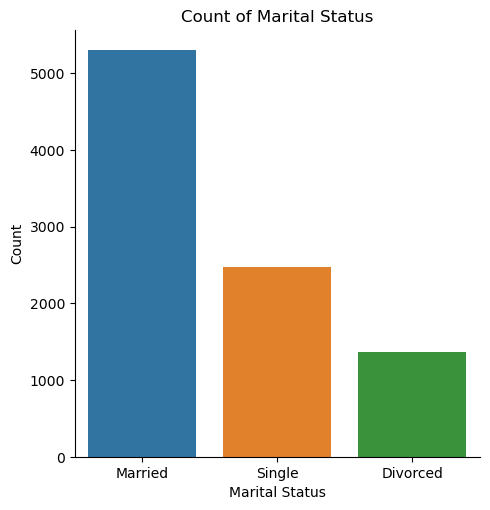

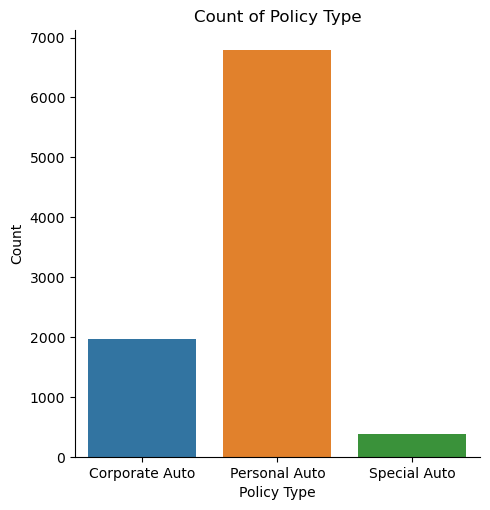

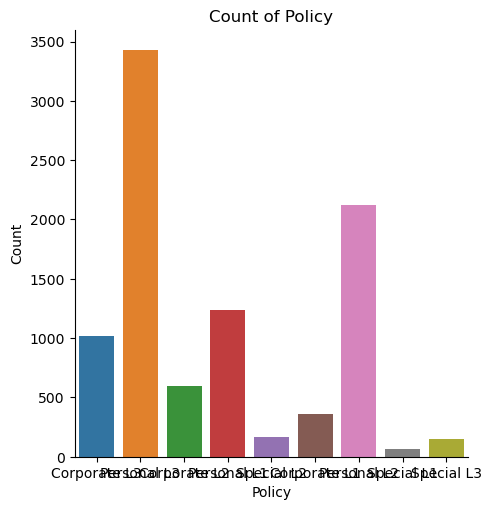

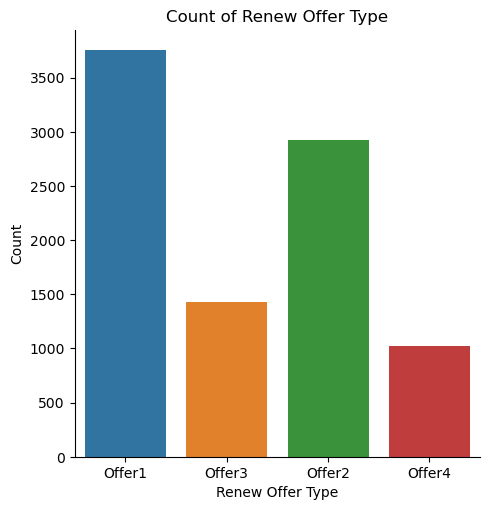

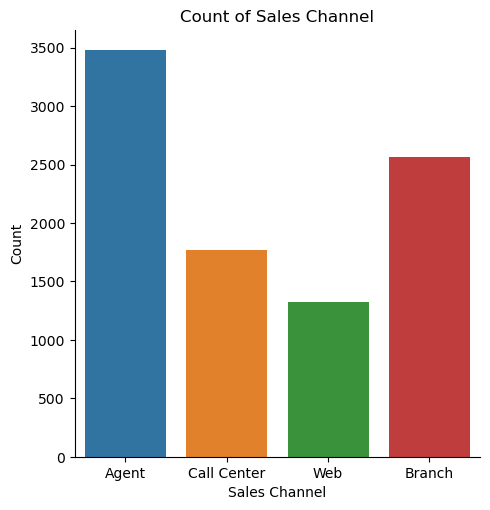

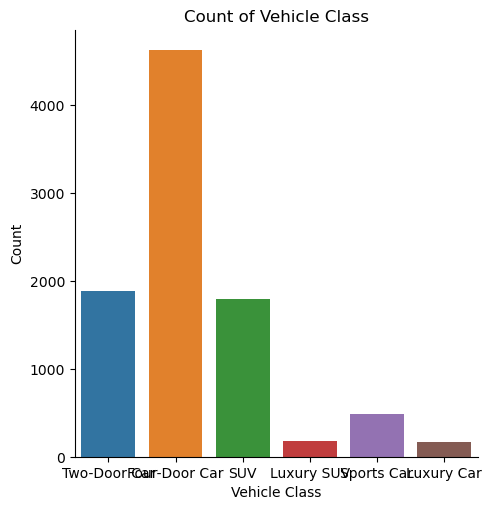

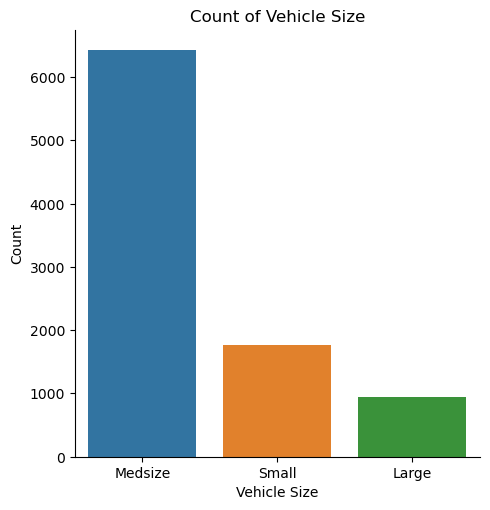

In [23]:
for col in categorical_df:
    sns.catplot(x=col, kind='count', data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.show()

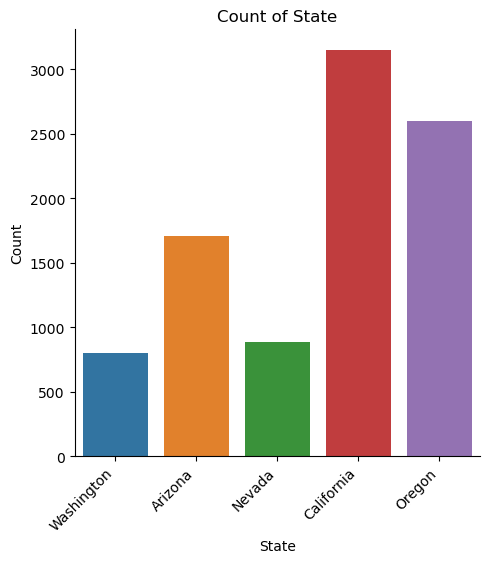

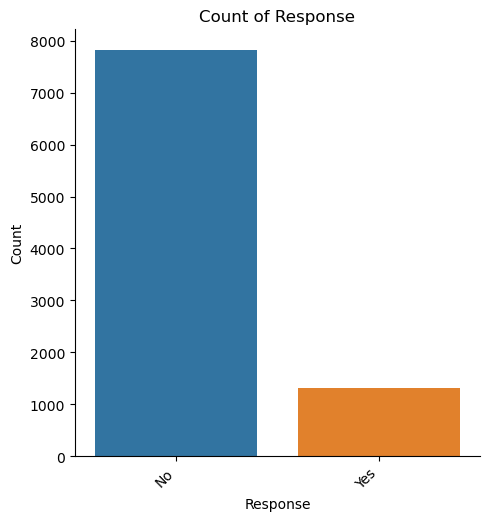

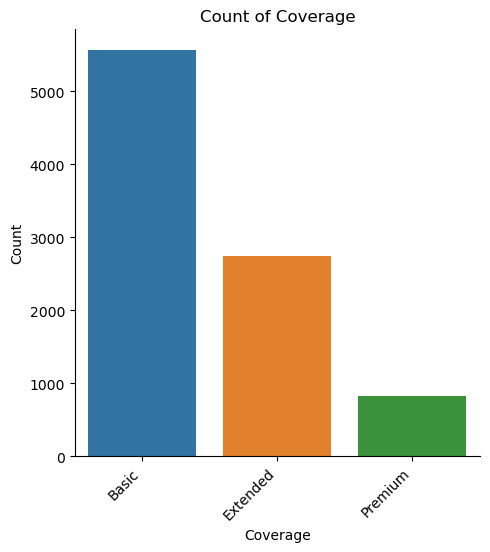

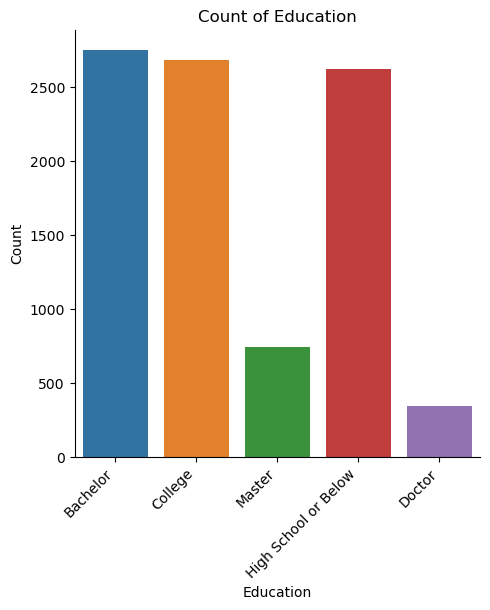

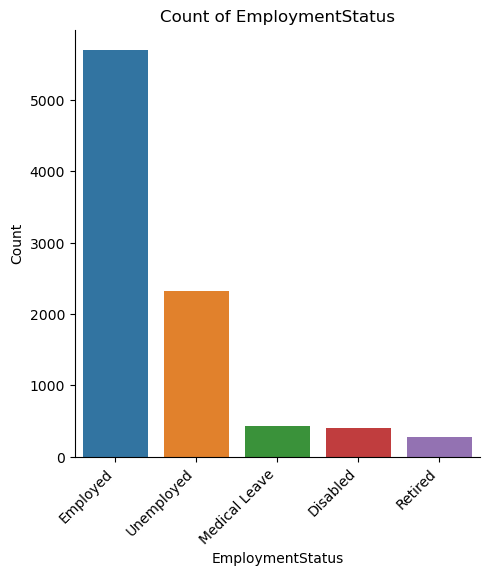

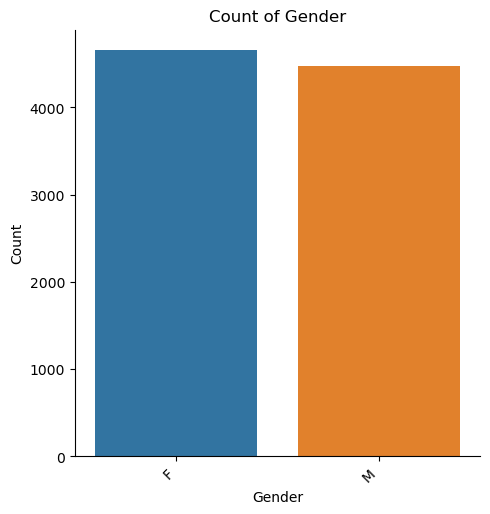

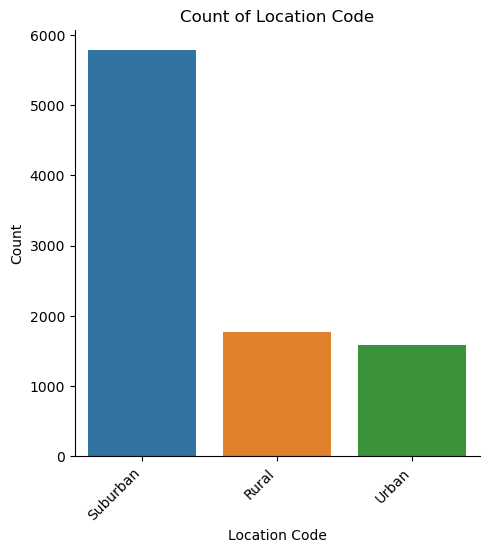

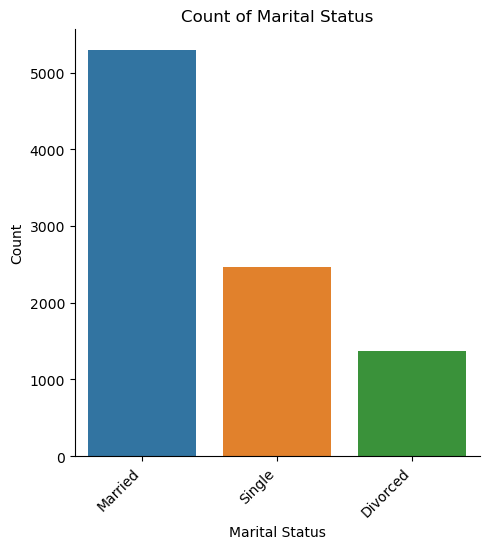

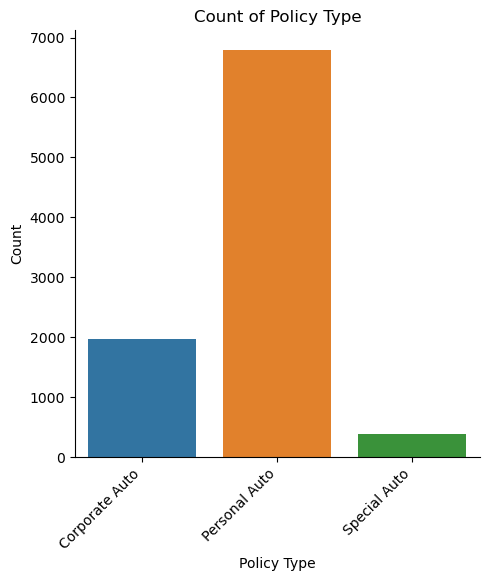

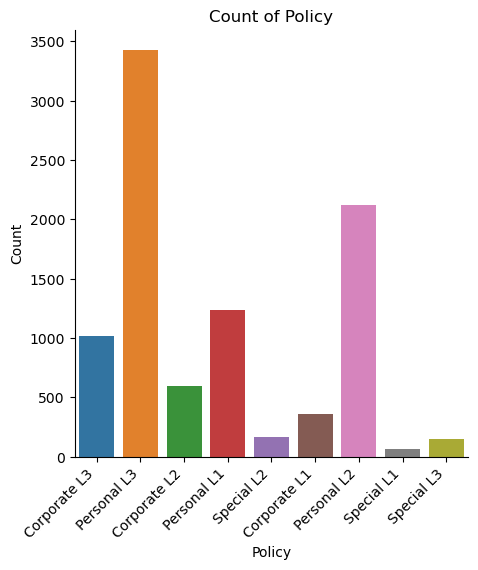

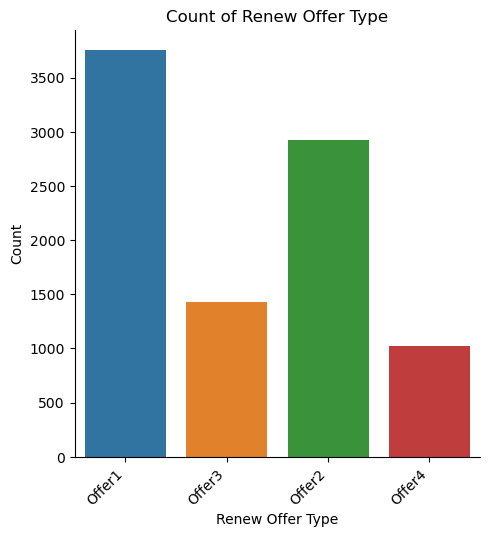

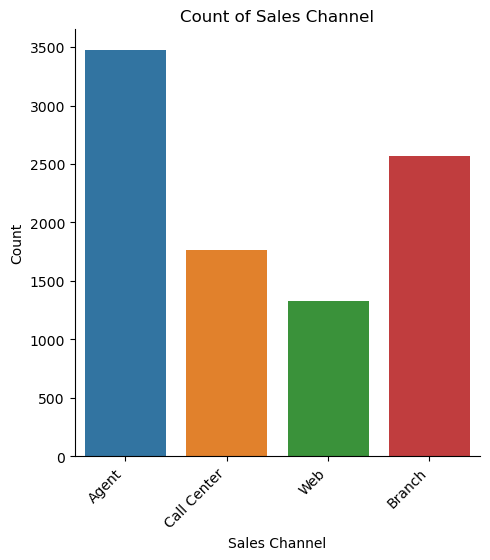

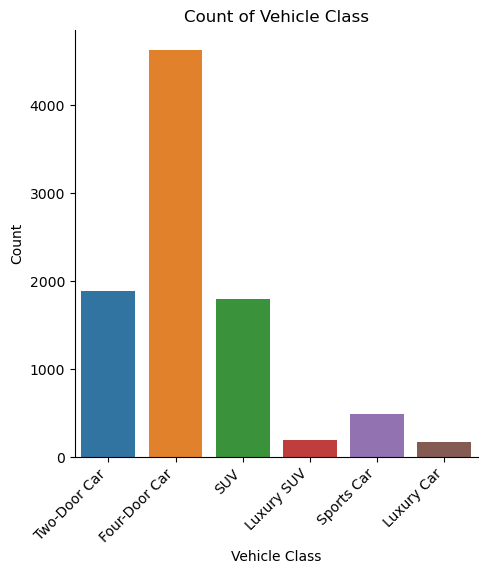

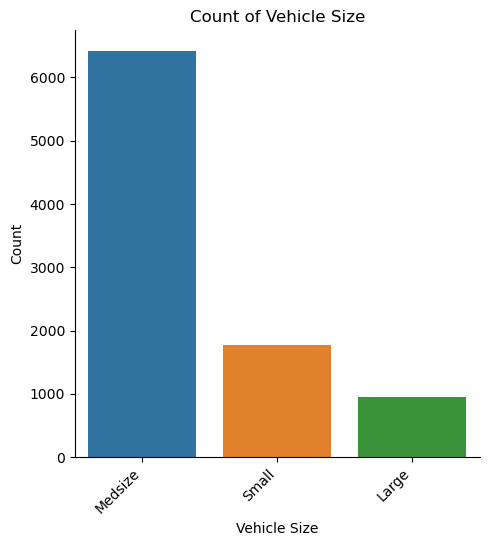

In [25]:
for col in categorical_df:
    sns.catplot(x=col, kind='count', data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right') # adjust the spacing between the labels
    plt.show()

### For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [27]:
for col in categorical_df:
    print(col + ':\n' + str(categorical_df[col].value_counts()) + '\n')

State:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Response:
No     7826
Yes    1308
Name: Response, dtype: int64

Coverage:
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

EmploymentStatus:
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

Gender:
F    4658
M    4476
Name: Gender, dtype: int64

Location Code:
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

Marital Status:
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

Policy Type:
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dt

Using this function we can easily see the different values for all categorical columns, allowing us to check if we need to clean up any NaNs / unknowns. In this case, it seems that all data is relevant. 